### Alternate options

4 options.

H: to go to nearest coridoor cell.

G: go to goal cell in room region.

L: go to (2, 0)

R: go to (2, 3)

Described in report in more detail

In [ ]:
'''
A bunch of imports, you don't have to worry about these
'''

import numpy as np
import random
import gym
from gym.wrappers import Monitor
import glob
import io
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import clear_output

Map:
        +---------+
        |R: | : :G|
        | : | : : |
        | : : : : |
        | | : | : |
        |Y| : |B: |
        +---------+
    ### Actions
    There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east
    - 3: move west
    - 4: pickup passenger
    - 5: drop off passenger
    ### Observations
    There are 500 discrete states since there are 25 taxi positions, 5 possible
    locations of the passenger (including the case when the passenger is in the
    taxi), and 4 destination locations.
    Note that there are 400 states that can actually be reached during an
    episode. The missing states correspond to situations in which the passenger
    is at the same location as their destination, as this typically signals the
    end of an episode. Four additional states can be observed right after a
    successful episodes, when both the passenger and the taxi are at the destination.
    This gives a total of 404 reachable discrete states.
    Passenger locations:
    - 0: R(ed)
    - 1: G(reen)
    - 2: Y(ellow)
    - 3: B(lue)
    - 4: in taxi
    Destinations:
    - 0: R(ed)
    - 1: G(reen)
    - 2: Y(ellow)
    - 3: B(lue)
    ### Rewards
    - -1 per step unless other reward is triggered.
    - +20 delivering passenger.
    - -10  executing "pickup" and "drop-off" actions illegally.
    state space is represented by:
    (taxi_row, taxi_col, passenger_location, destination)


In [ ]:
# from gym.envs.toy_text.taxi import TaxiEnv
# env = TaxiEnv()

env = gym.make('Taxi-v3')
env.reset()

#Current State

env.s = 1
print(env.s)
# 4x12 grid = 48 states
print ("Number of states:", env.nS)

print ("Number of actions that an agent can take:", env.nA)

action = ["south", "north", "east", "west", "pickup", "drop"]
# Example Transitions
rnd_action = random.randint(0, 5)
print ("Action taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
print ("Transition probability:", t_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)
env.render()


1
Number of states: 500
Number of actions that an agent can take: 6
Action taken: pickup
Transition probability: {'prob': 1.0}
Next state: 47
Reward recieved: -10
Terminal state: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


In [ ]:
def decode1(i):
        out = []
        out.append(i % 4)
        i = i // 4
        out.append(i % 5)
        i = i // 5
        out.append(i % 5)
        i = i // 5
        out.append(i)
        assert 0 <= i < 5
        ans = []
        for j in reversed(out):
          ans.append(j)
        return ans
        


In [ ]:
def encode1(state):
        # (5) 5, 5, 4
        taxi_row = state[0]
        taxi_col = state[1]
        pass_loc = state[2]
        dest_idx = state[3]
        i = taxi_row
        i *= 5
        i += taxi_col
        i *= 5
        i += pass_loc
        i *= 4
        i += dest_idx
        return i

### Handcoding policy for options

In [ ]:
'''
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
'''

QH1 = np.zeros((5,5))
QH1[0,0] = 0
QH1[0,1] = 0
QH1[0,2] = 0
QH1[0,3] = 0
QH1[0,4] = 0
QH1[1,0] = 0
QH1[1,1] = 0
QH1[1,2] = 0
QH1[1,3] = 0
QH1[1,4] = 0
QH1[2,0] = 0
QH1[2,1] = 0
QH1[2,2] = 0
QH1[2,3] = 0
QH1[2,4] = 0
QH1[3,0] = 1
QH1[3,1] = 1
QH1[3,2] = 1
QH1[3,3] = 1
QH1[3,4] = 1
QH1[4,0] = 1
QH1[4,1] = 1
QH1[4,2] = 1
QH1[4,3] = 1
QH1[4,4] = 1

'''
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
'''

QG1 = np.zeros((5,5))
QG1[0,0] = 0
QG1[0,1] = 3
QG1[0,2] = 2
QG1[0,3] = 2
QG1[0,4] = 0
QG1[1,0] = 1
QG1[1,1] = 1
QG1[1,2] = 1
QG1[1,3] = 1
QG1[1,4] = 1
QG1[2,0] = 0
QG1[2,1] = 0
QG1[2,2] = 0
QG1[2,3] = 0
QG1[2,4] = 0
QG1[3,0] = 0
QG1[3,1] = 0
QG1[3,2] = 0
QG1[3,3] = 0
QG1[3,4] = 0
QG1[4,0] = 0
QG1[4,1] = 0
QG1[4,2] = 0
QG1[4,3] = 0
QG1[4,4] = 3




In [ ]:
'''
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
'''

QL1 = np.zeros((5,5))
QL1[2,0] = 3
QL1[2,1] = 3
QL1[2,2] = 3
QL1[2,3] = 3
QL1[2,4] = 3

In [ ]:
'''
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
'''

QR1 = np.zeros((5,5))
QR1[2,0] = 2
QR1[2,1] = 2
QR1[2,2] = 2
QR1[2,3] = 0
QR1[2,4] = 3

In [ ]:
Qs3 = [QH1, QG1, QL1, QR1]
goal_states = [[[2,0],[2,1],[2,2],[2,3], [2, 4]], [[0,0],[0,4],[4,0],[4,3]], [[2, 0]], [[2, 3]]]


In [ ]:
seed = 42
rg = np.random.RandomState(seed)
def egreedy_policy(q_values,state,epsilon):
    state_rc = decode1(state)
    if state_rc[0] == 2:
        if rg.rand() < epsilon:
            return rg.choice([0, 1, 2, 3, 4, 5, 8, 9])
        else:
            q_values[state][6] = -1000
            q_values[state][7] = -1000
            return np.argmax(q_values[state])
    elif state_rc[0] >= 3 and state_rc[1] <= 2 and state_rc[1] >= 1:
        if rg.rand() < epsilon:
            return rg.choice([0, 1, 2, 3, 4, 5, 6])
        else:
            q_values[state][7] = -1000
            q_values[state][8] = -1000
            q_values[state][9] = -1000
            return np.argmax(q_values[state])
    else:
        if rg.rand() < epsilon:
            return rg.choice([0, 1, 2, 3, 4, 5, 6, 7])
        else:
            q_values[state][8] = -1000
            q_values[state][9] = -1000
            return np.argmax(q_values[state])

In [ ]:
def take_option3(state , action):
  optdone = False
  
  state_rc = decode1(state)
  
  optact = Qs3[action - 6][state_rc[0]][state_rc[1]]
  if(state_rc[:2] in goal_states[action - 6]):
    optdone = True
  

  return [optact, optdone]







### SMDP

In [ ]:
def SMDP(episodes=10000, gamma = 0.9, alpha = 0.6):
    #### SMDP Q-Learning 
    q_values_SMDP = np.zeros((500,10))
    rewards = np.zeros((episodes))
    freq_SMDP = np.zeros((500, 10))
    # Add parameters you might need here
    gamma = 0.9
    alpha = 0.6
    # Iterate over 1000 episodes
    for i in range(10000):
        state = env.reset()    
        done = False
        reward1 = 0
        # While episode is not over
        #for i1 in range(10):
        while not done:
            # Choose action 
            
            action = egreedy_policy(q_values_SMDP, state, epsilon=0.1)
            
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, t_prob = env.step(action)
                q_values_SMDP[state][action] = q_values_SMDP[state][action] + alpha * (reward + gamma * max(q_values_SMDP[next_state]) - q_values_SMDP[state][action])
                freq_SMDP[state][action] += 1
                state = next_state
                reward1 += reward
            
            # Checking if action chosen is an option
            reward_bar = 0
            gamma_bar = 1
            if action >= 6:                     #4: # action => Away option
                start_state = state
                optdone = False
                #for i2 in range(5):
                while (optdone == False):
                    
                    # Think about what this function might do?
                    optact,optdone = take_option3(state,action)
                    optact = int(optact)
                    state_rc = decode1(state)
                    next_state, reward, done,_ = env.step(optact)
                    
                    # Is this formulation right? What is this term?
                    reward_bar = reward_bar + gamma_bar*reward
                    gamma_bar = gamma_bar*gamma
                    reward1 += reward
                
                    # Complete SMDP Q-Learning Update
                    # Remember SMDP Updates. When & What do you update? 
                    
                    state = next_state
                    if optdone == True:
                        q_values_SMDP[start_state][action] = q_values_SMDP[start_state][action] + alpha * (reward_bar + gamma_bar*max(q_values_SMDP[next_state]) - q_values_SMDP[start_state][action])
                        freq_SMDP[start_state][action] += 1
            
        rewards[i] = reward1
   
    
        if i%100 == 0:
            print('{} episodes completed'.format(i))
    return rewards, q_values_SMDP, freq_SMDP

In [ ]:
def run_smdp_exp(num_exp=5, episodes=10000):
    all_rewards = np.zeros((num_exp, episodes))
    all_q_values_SMDP = np.zeros((num_exp, 500, 10))
    all_freq_SMDP = np.zeros((num_exp, 500, 10))
    for i in range(num_exp):
        rewards, q_values_SMDP, freq_SMDP = SMDP()
        all_rewards[i] = rewards
        all_q_values_SMDP[i] = q_values_SMDP
        all_freq_SMDP[i] = freq_SMDP
    return all_rewards, all_q_values_SMDP, all_freq_SMDP

In [ ]:
all_rewards_SMDP, all_q_values_SMDP, all_freq_SMDP = run_smdp_exp(5)

0 episodes completed
100 episodes completed
200 episodes completed
300 episodes completed
400 episodes completed
500 episodes completed
600 episodes completed
700 episodes completed
800 episodes completed
900 episodes completed
1000 episodes completed
1100 episodes completed
1200 episodes completed
1300 episodes completed
1400 episodes completed
1500 episodes completed
1600 episodes completed
1700 episodes completed
1800 episodes completed
1900 episodes completed
2000 episodes completed
2100 episodes completed
2200 episodes completed
2300 episodes completed
2400 episodes completed
2500 episodes completed
2600 episodes completed
2700 episodes completed
2800 episodes completed
2900 episodes completed
3000 episodes completed
3100 episodes completed
3200 episodes completed
3300 episodes completed
3400 episodes completed
3500 episodes completed
3600 episodes completed
3700 episodes completed
3800 episodes completed
3900 episodes completed
4000 episodes completed
4100 episodes completed
4200

In [241]:
def running_avg(rewards):
    rewards_10 = np.zeros((10000))
    rewards_100 = np.zeros((10000))
    for i in range(10000):
        rewards_10[i] = np.mean(rewards[max(0, i-9):i+1])
        rewards_100[i] = np.mean(rewards[max(0, i-99):i+1])
    return rewards_10, rewards_100
def plots_and_stats(all_rewards, all_freq):
    num_exp = all_rewards.shape[0]
    all_rewards_10 = np.zeros((num_exp, 10000))
    all_rewards_100 = np.zeros((num_exp, 10000))
    size = (8, 8)
    for i in range(num_exp):
        rewards = all_rewards[i]
        all_rewards_10[i], all_rewards_100[i] = running_avg(rewards)
        plt.figure(figsize=size)
        plt.title('Rewards_Exp{}Avg{}'.format(i, 1))
        plt.plot(np.arange(10000),all_rewards[i] )
        plt.figure(figsize=size)
        plt.title('Rewards_Exp{}Avg{}'.format(i, 10))
        plt.plot(np.arange(10000), all_rewards_10[i])
        plt.figure(figsize=size)
        plt.title('Reward_Exp{}Avg{}'.format(i, 100))
        plt.plot(np.arange(10000), all_rewards_100[i])
    plt.figure(figsize=size)
    plt.title('Average_reward')
    plt.plot(np.arange(10000), np.mean(all_rewards, axis=0))
    plt.figure(figsize=size)
    plt.title('Average_reward_10')
    plt.plot(np.arange(10000), np.mean(all_rewards_10, axis=0))
    plt.figure(figsize=size)
    plt.title('Average_reward_100')
    plt.plot(np.arange(10000), np.mean(all_rewards_100, axis=0))
    print('rewards stats')
    for i in range(num_exp):
        print(all_rewards[i][-1], all_rewards_10[i][-1], all_rewards_100[i][-1])
    print('converge stats')
    for i in range(num_exp):
        for j in range(10000):
            if all_rewards_100[i][j] > 0:
                print(j+1)
                break
    print('freq stats')
    for i in range(num_exp):
        print(np.sum(all_freq[i], axis=0))

<BarContainer object of 10 artists>

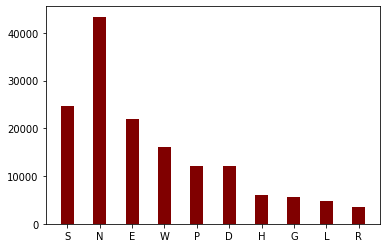

In [245]:
plt.bar(['S', 'N', 'E', 'W', 'P', 'D', 'H', 'G', 'L', 'R'], [24599, 43402, 22001, 16060, 12153, 12059,  5940,  5597,  4739,  3554], color ='maroon', width = 0.4)

rewards stats
-2.0 2.7 3.18
2.0 3.2 2.88
2.0 2.5 2.14
7.0 -0.2 3.67
8.0 4.6 3.39
converge stats
634
552
502
529
418
freq stats
[24599. 43402. 22001. 16060. 12153. 12059.  5940.  5597.  4739.  3554.]
[27705. 42079. 23629. 25384. 12406. 12191.  5378.  3950.  2098.  3535.]
[28350. 42338. 17502. 17105. 12206. 12026.  4733.  4656.  4374.  3879.]
[27637. 43410. 22124. 21765. 12325. 12159.  5070.  3038.  3085.  4177.]
[27093. 42070. 20898. 20876. 12224. 12136.  4871.  4899.  3491.  3870.]


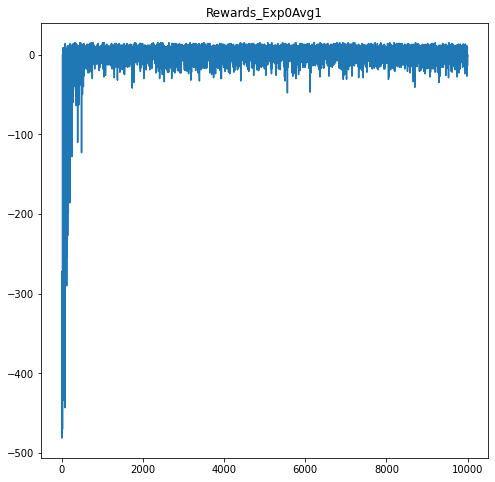

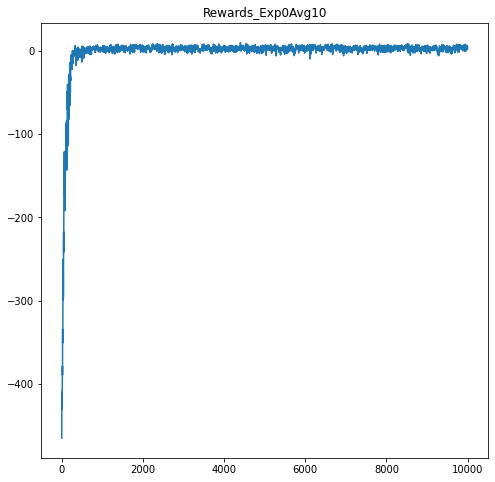

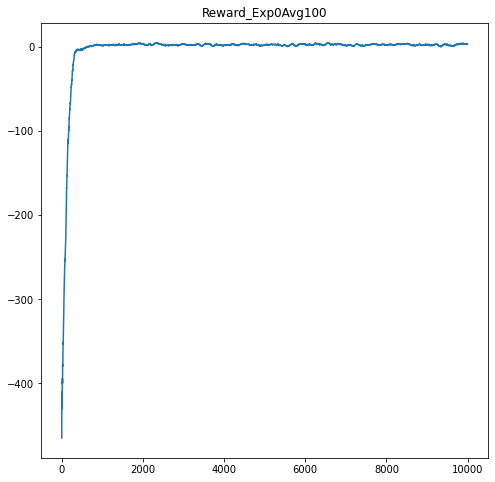

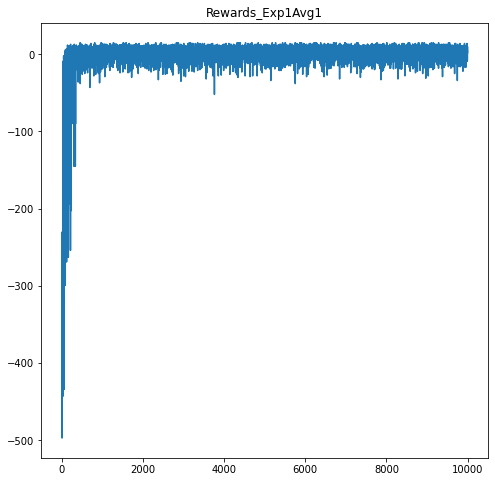

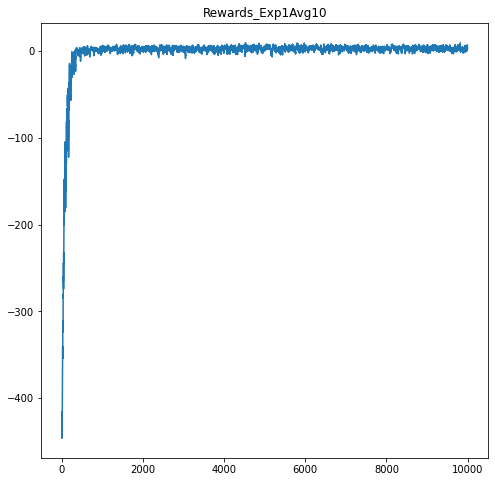

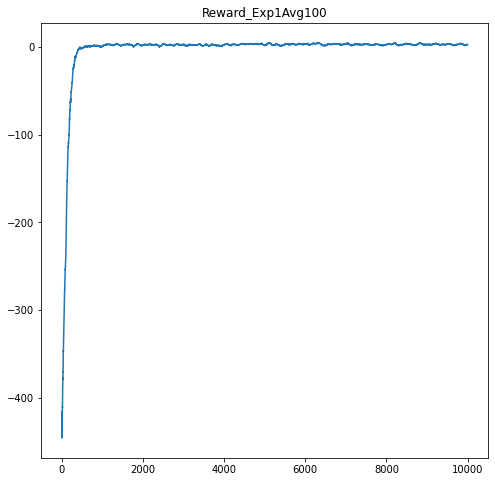

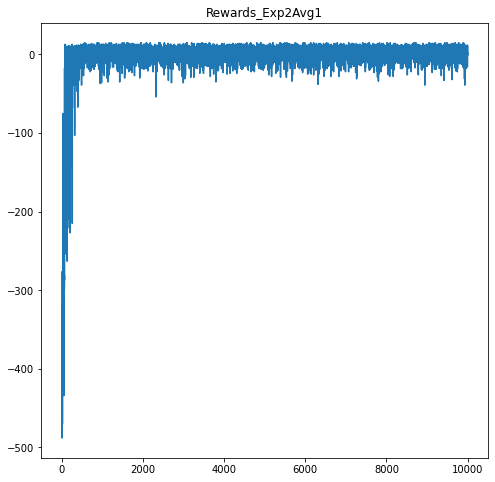

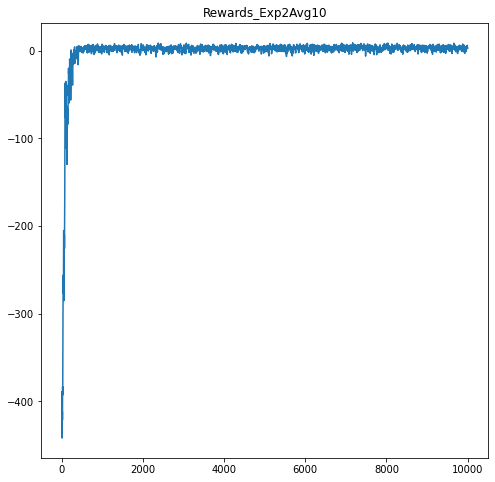

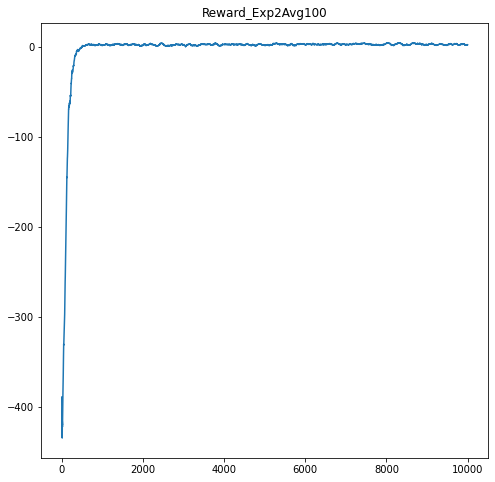

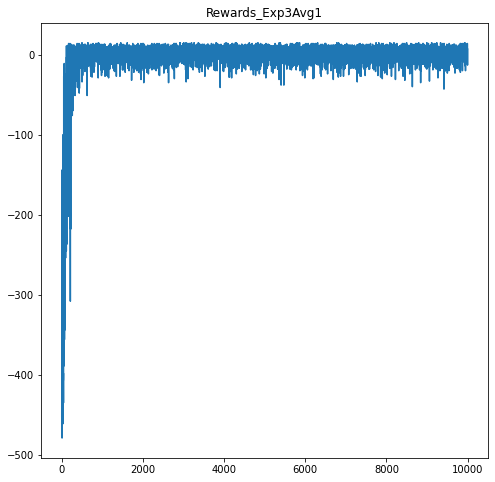

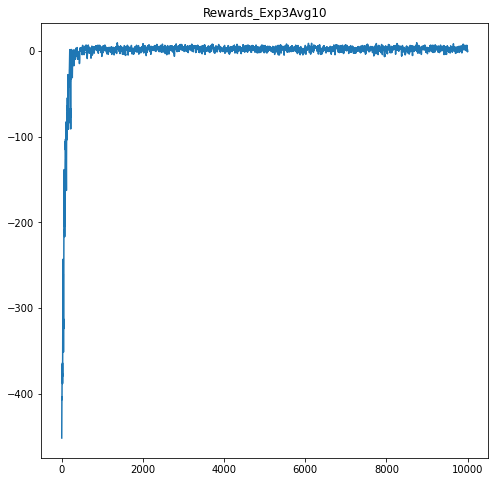

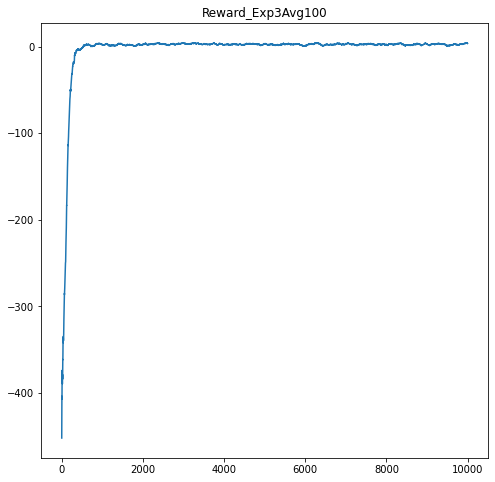

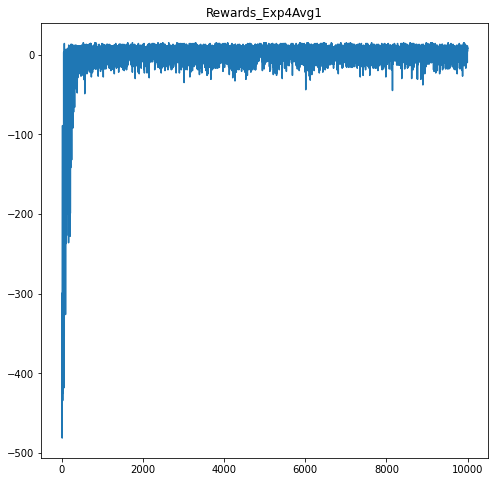

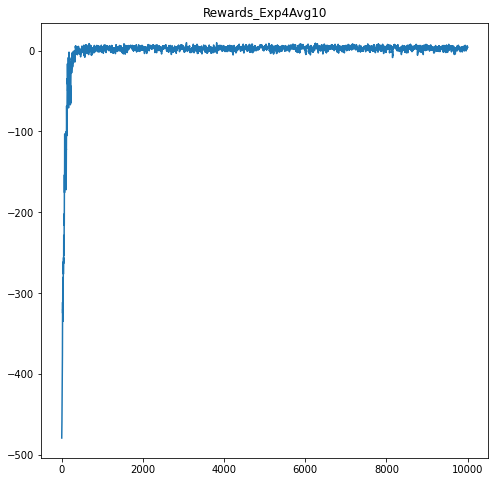

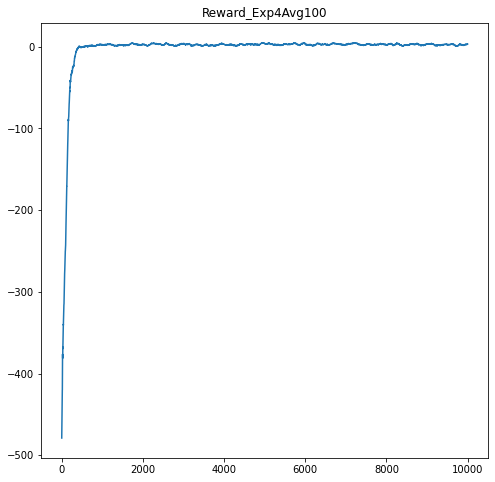

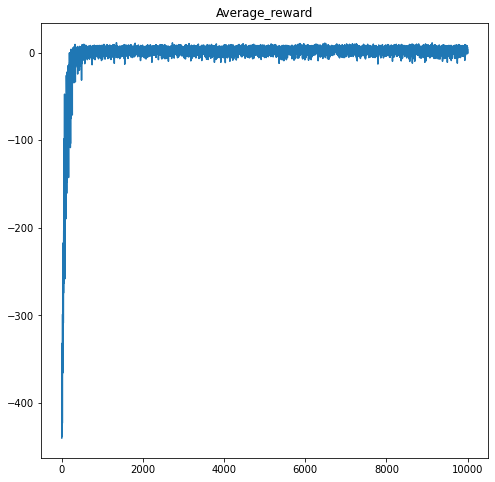

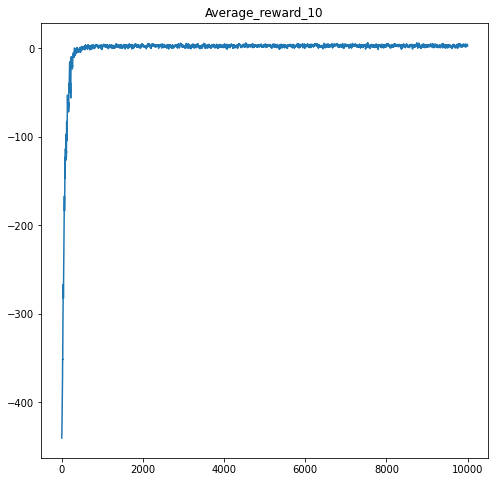

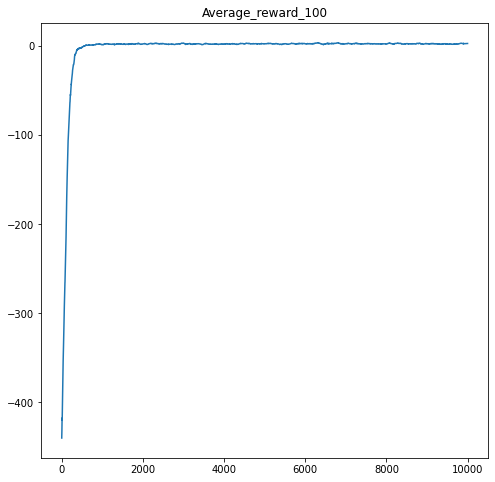

In [242]:
plots_and_stats(all_rewards_SMDP, all_freq_SMDP)

Text(0, 0.5, 'Episodes taken to cross 0 average reward (average over 100 episodes)')

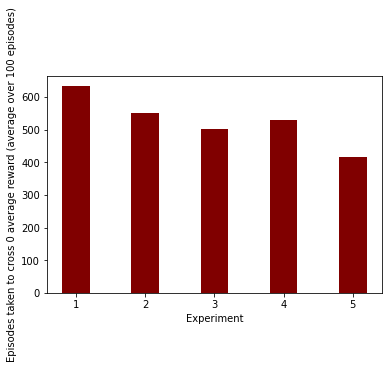

In [249]:

plt.bar([1, 2, 3, 4, 5], [634, 552, 502, 529, 418], color ='maroon', width = 0.4)
plt.xlabel('Experiment')
plt.ylabel('Episodes taken to cross 0 average reward (average over 100 episodes)')

### Intra Option

In [ ]:
def Intra(episodes=10000, gamma = 0.9, alpha = 0.6):
    q_values_Intra = np.zeros((500, 10))
    freq_Intra = np.zeros((500, 10))

    # Add parameters you might need here
    rewards = np.zeros((10000))
    gamma = 0.9
    alpha = 0.6
    # Iterate over 1000 episodes
    for ep in range(10000):
        state = env.reset()    
        done = False
        # While episode is not over
        reward1 = 0
        while not done:
            # Choose action        
            action = egreedy_policy(q_values_Intra, state, epsilon=0.1)
            
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, t_prob = env.step(action)
                q_values_Intra[state][action] = q_values_Intra[state][action] + alpha * (reward + gamma * max(q_values_Intra[next_state]) - q_values_Intra[state][action])
                freq_Intra[state][action] += 1
                state = next_state
                reward1 += reward
            
            # Checking if action chosen is an option
            if action >= 6: # action => Away option
                optdone = False
                while (optdone == False):
                    optact, optdone = take_option3(state, action)
                    next_state, reward, done,_ = env.step(optact)
                    optact = int(optact)
                    #print(state, optact)
                    q_values_Intra[state][optact] = q_values_Intra[state][optact] + alpha * (reward + gamma*max(q_values_Intra[next_state]) - q_values_Intra[state][optact])
                    freq_Intra[state][optact] += 1
                    reward1 += reward
                    for i in range(6,10):
                        optact1, optdone1 = take_option3(state,i)
                        if(optact1 == optact):
                            if optdone1 is True:
                                q_values_Intra[state][i] = q_values_Intra[state][i] + alpha * (reward + gamma*max(q_values_Intra[next_state]) - q_values_Intra[state][i])
                            else:
                                q_values_Intra[state][i] = q_values_Intra[state][i] + alpha * (reward + gamma*(q_values_Intra[next_state][i]) - q_values_Intra[state][i])                      
                            freq_Intra[state][i] += 1
                    state = next_state
        rewards[ep] = reward1
        if ep%100 == 0:
            print('{} episodes completed'.format(ep))  
    return rewards, q_values_Intra, freq_Intra

In [ ]:
def run_intra_exp(num_exp=5, episodes=10000):
    all_rewards = np.zeros((num_exp, episodes))
    all_q_values_intra = np.zeros((num_exp, 500, 10))
    all_freq_intra = np.zeros((num_exp, 500, 10))
    for i in range(num_exp):
        rewards, q_values_intra, freq_intra = SMDP()
        all_rewards[i] = rewards
        all_q_values_intra[i] = q_values_intra
        all_freq_intra[i] = freq_intra
    return all_rewards, all_q_values_intra, all_freq_intra

In [ ]:
all_rewards_intra, all_q_values_intra, all_freq_intra = run_intra_exp()

0 episodes completed
100 episodes completed
200 episodes completed
300 episodes completed
400 episodes completed
500 episodes completed
600 episodes completed
700 episodes completed
800 episodes completed
900 episodes completed
1000 episodes completed
1100 episodes completed
1200 episodes completed
1300 episodes completed
1400 episodes completed
1500 episodes completed
1600 episodes completed
1700 episodes completed
1800 episodes completed
1900 episodes completed
2000 episodes completed
2100 episodes completed
2200 episodes completed
2300 episodes completed
2400 episodes completed
2500 episodes completed
2600 episodes completed
2700 episodes completed
2800 episodes completed
2900 episodes completed
3000 episodes completed
3100 episodes completed
3200 episodes completed
3300 episodes completed
3400 episodes completed
3500 episodes completed
3600 episodes completed
3700 episodes completed
3800 episodes completed
3900 episodes completed
4000 episodes completed
4100 episodes completed
4200

rewards stats
5.0 2.1 2.73
-9.0 3.4 3.57
2.0 3.7 3.13
1.0 4.0 1.78
-5.0 5.7 3.66
converge stats
498
513
488
485
485
freq stats
[27324. 42151. 20578. 17798. 12299. 12081.  4868.  3684.  4630.  3869.]
[28869. 42197. 19724. 17255. 12265. 12075.  4475.  2995.  4413.  4019.]
[27854. 42166. 21722. 13947. 12318. 12108.  4871.  4586.  5490.  4148.]
[28169. 42098. 20041. 20373. 12335. 12066.  5016.  3246.  3934.  3744.]
[29062. 42416. 20722. 15322. 12206. 12078.  4629.  3599.  4959.  4151.]


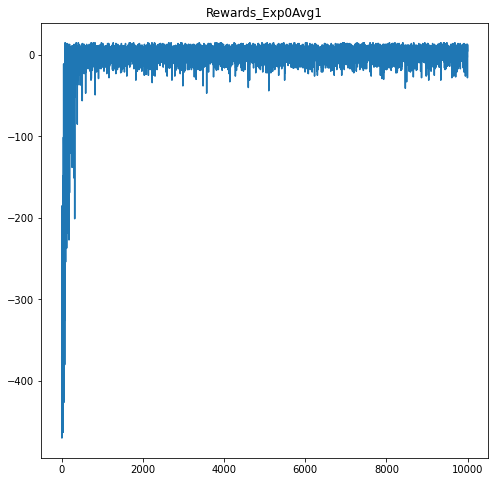

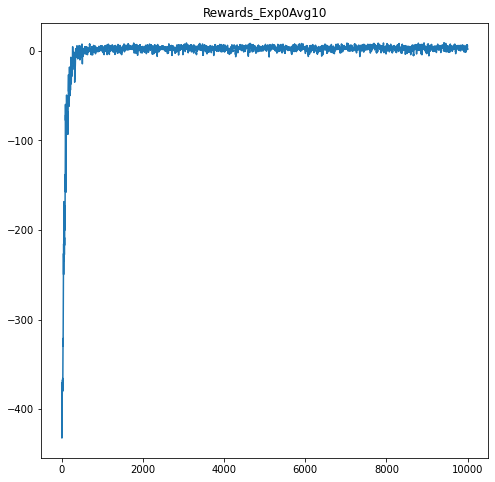

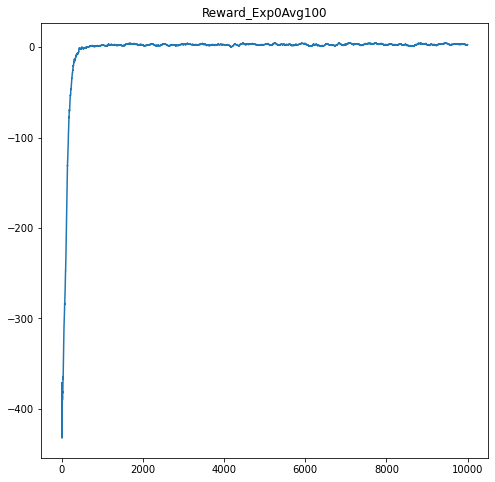

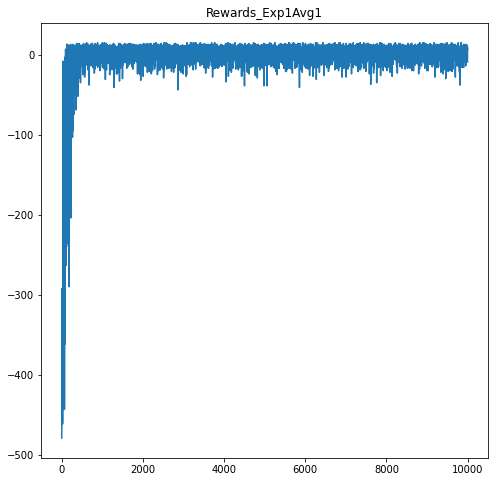

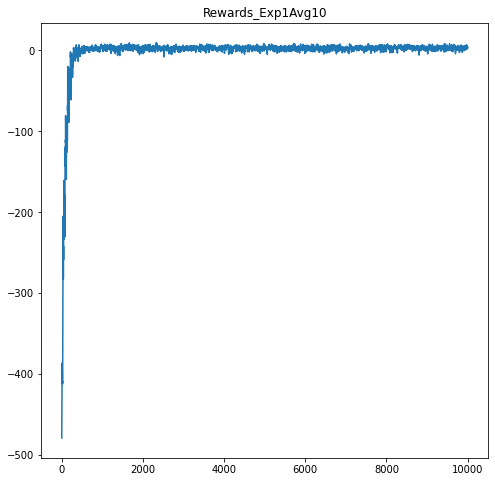

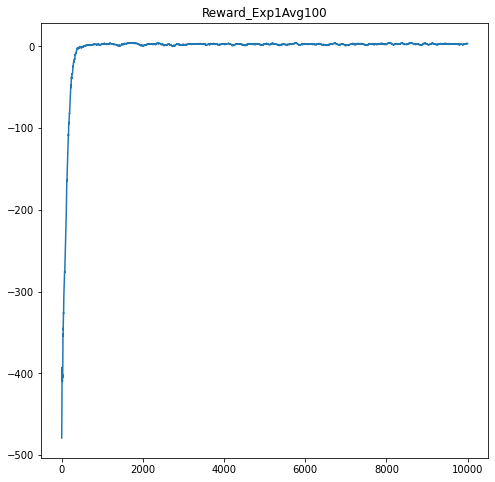

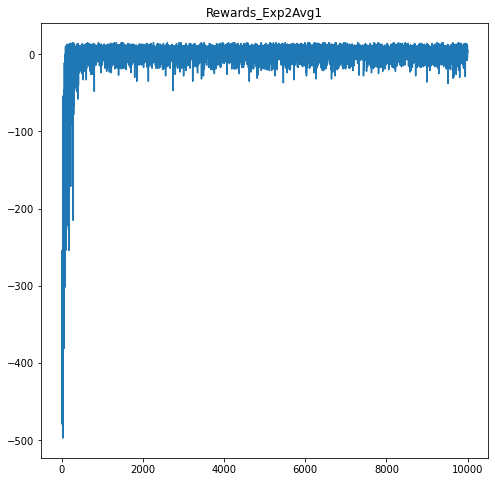

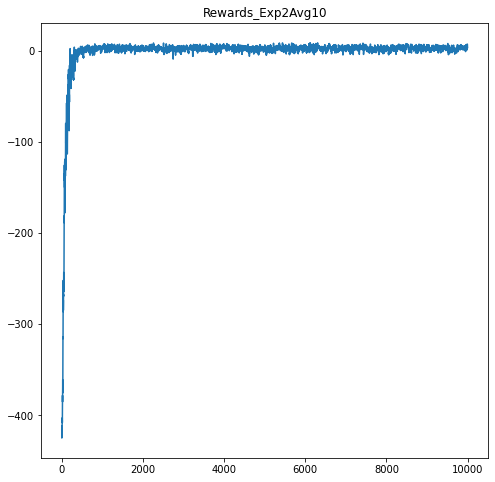

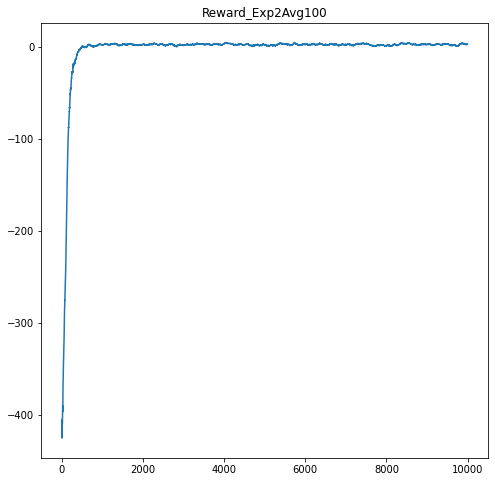

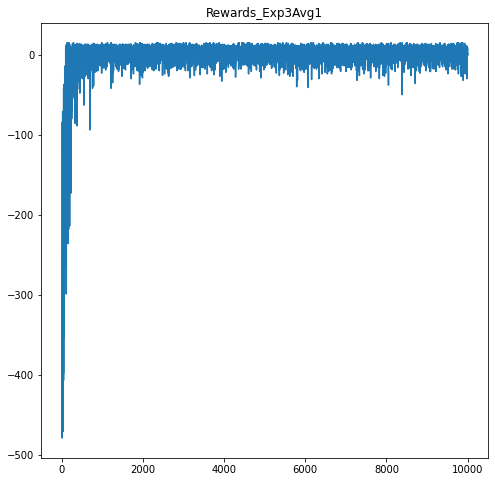

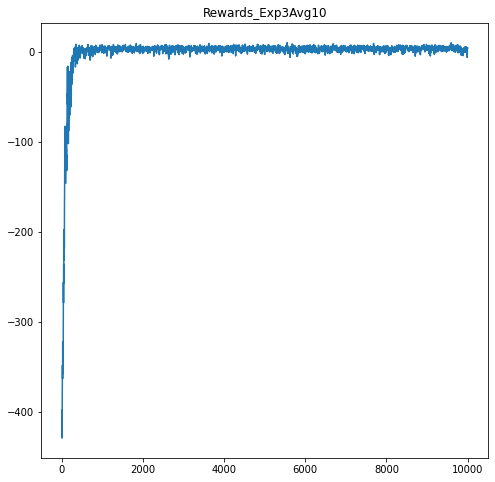

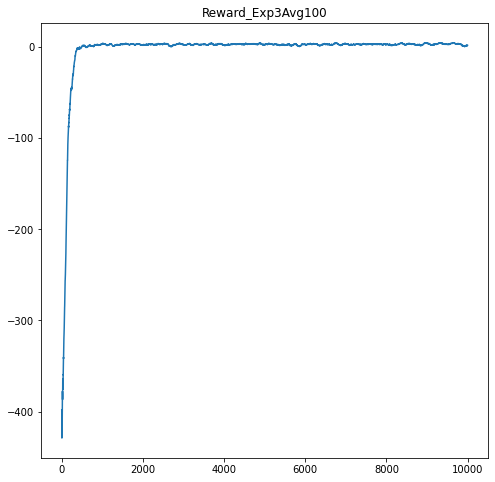

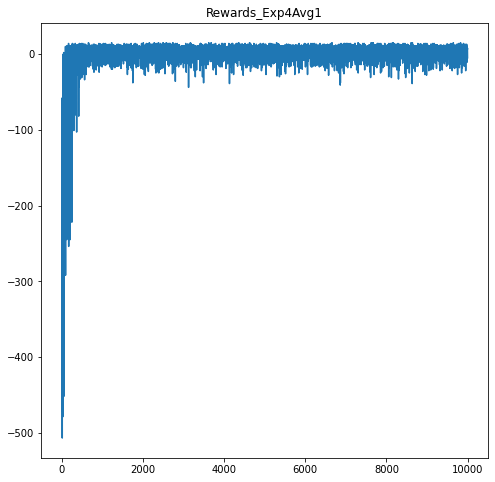

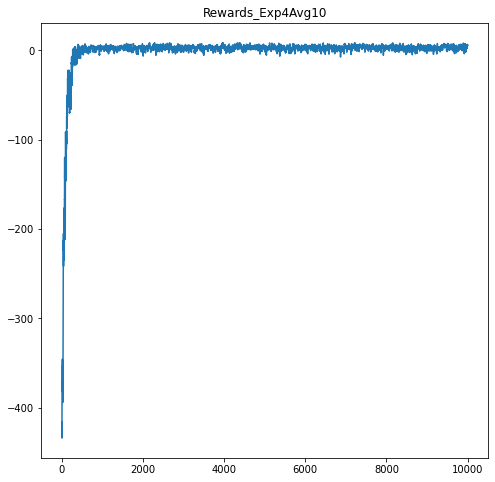

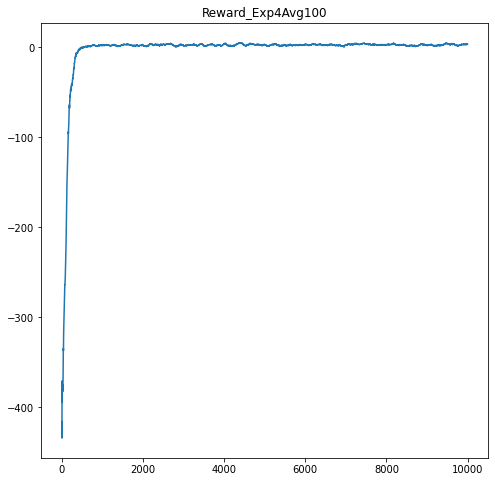

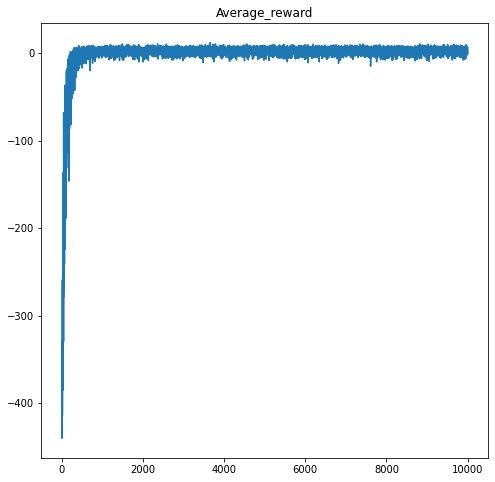

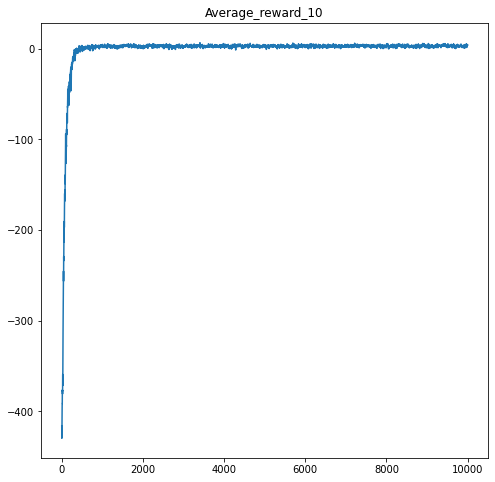

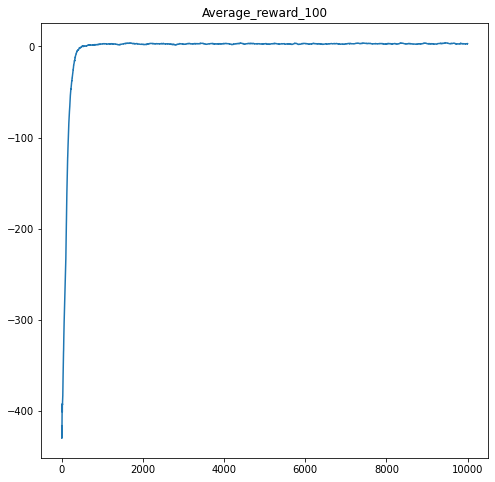

In [243]:
plots_and_stats(all_rewards_intra, all_freq_intra)

<BarContainer object of 10 artists>

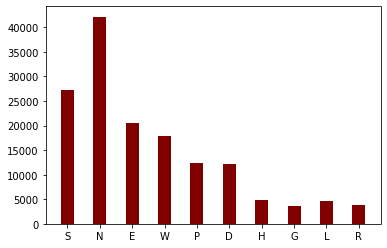

In [246]:
plt.bar(['S', 'N', 'E', 'W', 'P', 'D', 'H', 'G', 'L', 'R'], [27324, 42151, 20578, 17798, 12299, 12081,  4868,  3684,  4630,  3869], color ='maroon', width = 0.4)

Text(0, 0.5, 'Episodes taken to cross 0 average reward (average over 100 episodes)')

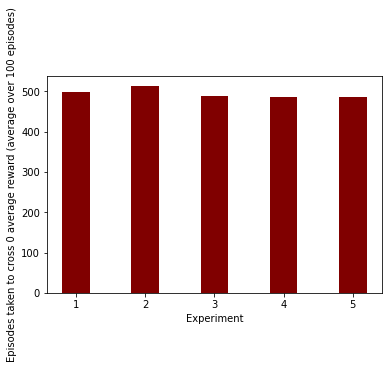

In [248]:

plt.bar([1, 2, 3, 4, 5], [498, 513, 488, 485, 485], color ='maroon', width = 0.4)
plt.xlabel('Experiment')
plt.ylabel('Episodes taken to cross 0 average reward (average over 100 episodes)')

In [250]:
def f(x):
    l = ['S', 'N', 'E', 'W', 'P', 'D', 'H', 'G', 'L', 'R']
    return l[np.argmax(x)]

In [251]:
def plot_Q(Q, message=None, save=False):
    plt.figure(figsize=(10,10))
    plt.title(message)
    plt.pcolor(Q.max(-1), edgecolors='k', linewidths=2)
    plt.colorbar()
    for i in range(5):
        for j in range(5):
            plt.text(i+0.4, j+0.4, f(Q[4-j][i]), fontsize = 25)
    return
    def x_direct(a):
        if a in [6, 8, 3]:
            return -1
        if a in [7, 2, 9]:
          return 1
        else: return 0
        #return 1 if a == LEFT else -1
    def y_direct(a):
        if a in [1, 6, 7,]:
            return 1
        if a in [0, 8, 9]:
          return -1
        else: return 0
        #return 1 if a == DOWN else -1
    policy = Q.argmax(-1)
    #print(policy)
    policyx = np.vectorize(x_direct)(policy)
    policyy = np.vectorize(y_direct)(policy)
    
    idx = np.indices(policy.shape)
    #print(idx)
    plt.quiver(idx[1][::-1].ravel()+0.5, idx[0][::-1].ravel()+0.5, policyx.ravel(), policyy.ravel(), pivot="middle", color='red')
    #print(save)
    if save:
        plt.savefig(fname = message, format = 'pdf')
    #plt.text([0, 1, 2], [0, 1, 2], "Pickup", fontsize = 50)
    plt.show()

### SMDP policy

[6 0 0 3 0]
[6 3 0 0 0]
[0 3 3 3 3]
[0 1 1 1 1]
[4 1 1 1 1]


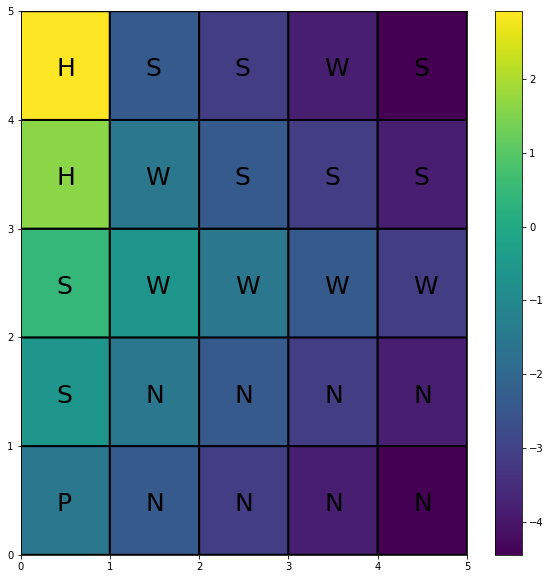

In [253]:
q_values_SMDP = all_q_values_SMDP[0]
q_SMDP1 = np.zeros((5,5,5,4,10));
for i in range(500):
  state_rc = decode1(i)
  q_SMDP1[state_rc[0],state_rc[1],state_rc[2],state_rc[3]] = q_values_SMDP[i]  

q_SMDP_ex1 = q_SMDP1[:,:,2, 3]
for i in range(5):
    print(np.argmax(q_SMDP_ex1[i],axis=1))
plot_Q(q_SMDP_ex1)


[2 0 3 6 0]
[0 0 7 6 0]
[2 9 9 3 9]
[1 1 3 0 3]
[1 1 4 5 3]


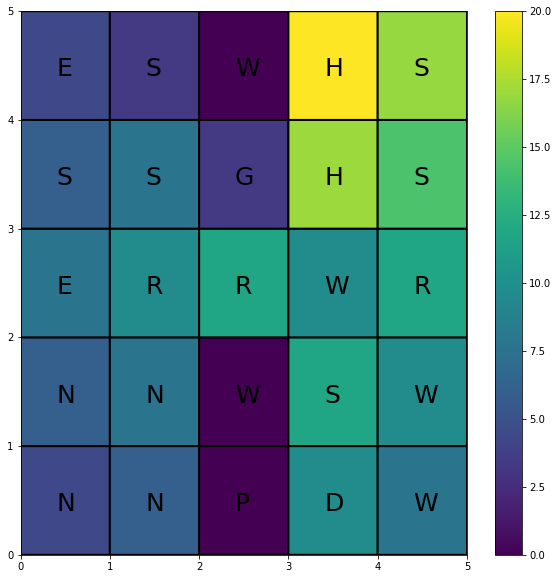

In [ ]:
q_SMDP1 = np.zeros((5,5,5,4,10));
for i in range(500):
  state_rc = decode1(i)
  #print(state_rc)
  q_SMDP1[state_rc[0],state_rc[1],state_rc[2],state_rc[3]] = q_values_SMDP[i]  

q_SMDP_ex1 = q_SMDP1[:,:,4, 3]
for i in range(5):
    print(np.argmax(q_SMDP_ex1[i],axis=1))
plot_Q(q_SMDP_ex1)


[7 0 0 3 0]
[6 0 0 3 0]
[0 3 3 3 3]
[0 1 3 1 3]
[4 1 3 1 1]


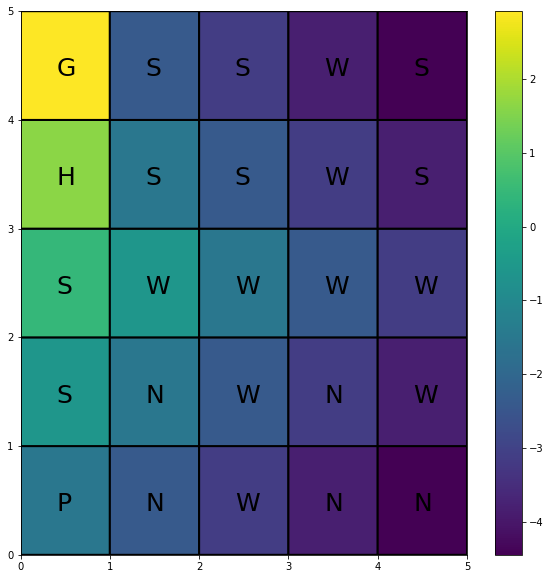

In [254]:
q_values_Intra = all_q_values_intra[0]
q_IO1 = np.zeros((5,5,5,4,10));
for i in range(500):
  state_rc = decode1(i)
  #print(state_rc)
  q_IO1[state_rc[0],state_rc[1],state_rc[2],state_rc[3]] = q_values_Intra[i]  

q_IO_ex1 = q_IO1[:,:,2,3]
for i in range(5):
    print(np.argmax(q_IO_ex1[i],axis=1))
plot_Q(q_IO_ex1)


### Intra Policy

[2 0 2 6 3]
[0 0 7 6 0]
[2 9 3 9 9]
[1 1 1 0 3]
[1 3 2 5 7]


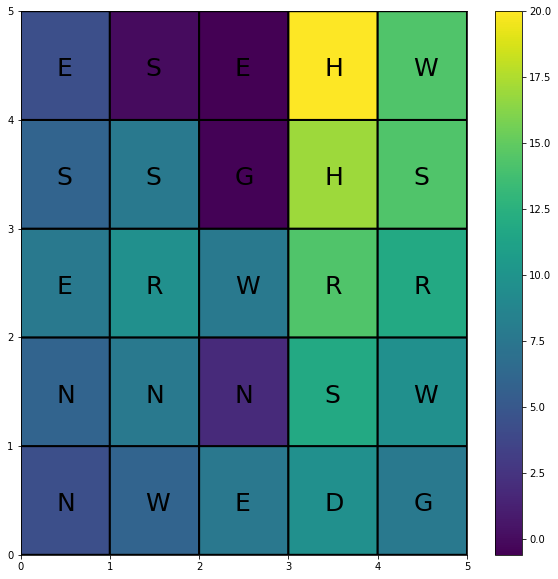

In [255]:
q_IO1 = np.zeros((5,5,5,4,10));
for i in range(500):
  state_rc = decode1(i)
  #print(state_rc)
  q_IO1[state_rc[0],state_rc[1],state_rc[2],state_rc[3]] = q_values_Intra[i]  

q_IO_ex1 = q_IO1[:,:,4,3]
for i in range(5):
    print(np.argmax(q_IO_ex1[i],axis=1))
plot_Q(q_IO_ex1)
